### 해당 내용은 inflearn의 '공공데이터로 파이썬 데이터 분석 시작하기' 내용의 실습 내용과 추가적으로 강의내용을 추가 주석들입니다.
### https://www.inflearn.com/course/공공데이터로-파이썬-데이터-분석-시작하기

# 전국 신규 민간 아파트 분양가격 동향

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램(distplot) 실습하기


## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/dataset/3035522/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [2]:
# 엑셀과 유사한 판다스 라이브러리를 불러옴
import pandas as pd

In [3]:
# 1.최근 분양가 파일 로드
# 2.로드한 데이터 df_last라는 변수에 담음
# 3. encode option을 주지 않으면 unicodeDecodeError 발생하니 옵션은 필수!
# 참고, euc-kr은 한글문자 조합 1만 1172자 중 2350자만 표현가능하다
# 그러나,UTF-8 cp949 인코딩을 사용하면, 1만 1172자 모두 커버 가능
df_last = pd.read_csv("data/주택도시보증공사_전국 신규 민간 아파트 분양가격 동향_20200331.csv", encoding="cp949")
df_last.shape
#(행, 열)

(4590, 5)

In [4]:
#head로 미리보기
# head 처럼 사용법을 잘모르는 함수가 있다면 shift + tab을 누르면 man 이나옴
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [5]:
# tail로도 미리보기 가능
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN
4589,제주,전용면적 102㎡초과,2020,3,3601


### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [6]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding="cp949")
df_first.shape

(17, 22)

In [7]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


### 데이터 요약하기

In [9]:
df_last.info()
# 지역명, 규모구분, 연도, 월 등의 데이터 갯수와 분양가격의 데이터 겟수가 다르다.
# 이유는 결측치(NaN)가 있기 때문, 이 부분을 해결해주어야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [10]:
df_last.isnull()
# True == 1, False == 0
# 각 컬럼을 isnull을 통해 구한후, true의 갯수 즉 1이 몇번 더해졌는지 확인하면
# NaN(결측치)가 몇개인지 구할 수 있다.
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
dtype: int64

In [11]:
# isna를 통해서도 가능
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    314
dtype: int64

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 
문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 
결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 
그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [12]:
# 초기 분양가격의 데이타 타입이 object이기 때문에,
# 수치 계산이 불가하여 수치데이터로 변환이 필요 -> astype을 통해서
# 하지만 이것으로 데이터 타입변환시, 공백이 껴있으면 str으로 인식하기때문에 변환 에러가 발생
# 이와 같은 상황을 피하기 위해서, pandas의 to_numeric에 옵션을 주어 공백을 없애면서
# 수치데이터로 형식 변화가 가능해진다.
# df_last["분양가격(㎡)"].astype(int)

pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")
#위에서 변화한 값이 데이터 타입이 float64인 이유는 NaN의 데이터 타입이 float64이기 때문

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4585    3955.0
4586    4039.0
4587    3962.0
4588       NaN
4589    3601.0
Name: 분양가격(㎡), Length: 4590, dtype: float64

In [13]:
#새로운 컬럼에 결측치를 제거하여 정제된 데이터를 넣어주자
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors="coerce")
df_last["분양가격"]

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
4585    3955.0
4586    4039.0
4587    3962.0
4588       NaN
4589    3601.0
Name: 분양가격, Length: 4590, dtype: float64

In [14]:
df_last["분양가격"].mean()

3270.160798122066

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [15]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


In [16]:
# 변경 전 칼럼인 분양가격(㎡) 컬럼을 요약
df_last["분양가격(㎡)"].describe()
#결과값:
# count 분양가격(㎡) 값은 데이터가 정제 되어있지 않기때문에
# nan 혹은 공백 또한 값으로 인정하여 카운트 했기때문에 정제된 데이터 셋보다 갯수가 많다.
# unique : 겹치지 않는 값의 갯수
# top : 가장 자주나오는 값
# freq : top(가장 많이 나오는 값)이 몇번 등장하였는지

count     4276
unique    1766
top       3395
freq        18
Name: 분양가격(㎡), dtype: object

In [17]:
# 수치데이터로 변경된 분양가격 컬럼을 요약
df_last["분양가격"].describe()

count     4260.000000
mean      3270.160798
std       1300.362742
min       1868.000000
25%       2454.750000
50%       2890.000000
75%       3601.000000
max      13835.000000
Name: 분양가격, dtype: float64

### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [18]:
df_last["규모구분"].unique()
# 결과 프린트를보면 행에 계속 반복하여, "전용면적"이라는 단어가 들어가있다.
# 이러한 경우 저 글자가 계속 데이터 용량에 잡이게 된다.
# 그리하면 처리 속도와 메모리를 계속 잡아 먹기때문에 불필요한것은 drop해주는것이 좋다

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [19]:
#df_last[index].replace("target", "")로 사용하면
#target 문자열이 100%일치 하지 않으면 replace가 되지 않음.
#따라서  pandas에서 제공하는 .str과 함께 쓰여진다
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "").str.strip()
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4585          전체
4586         60㎡
4587     60㎡~85㎡
4588    85㎡~102㎡
4589       102㎡~
Name: 전용면적, Length: 4590, dtype: object

### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [20]:
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841,5841.0,19275.3,전체


In [21]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4590 non-null   object 
 1   규모구분     4590 non-null   object 
 2   연도       4590 non-null   int64  
 3   월        4590 non-null   int64  
 4   분양가격(㎡)  4276 non-null   object 
 5   분양가격     4260 non-null   float64
 6   평당분양가격   4260 non-null   float64
 7   전용면적     4590 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 287.0+ KB


In [22]:
# drop시 axis 주의!!!
# axis 0: 행, 1: 열
df_last = df_last.drop(["규모구분", "분양가격(㎡)"], axis=1)

In [23]:
# 컬럼 제거를 통해 메모리 사용량이 줄은것을 확인
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4590 non-null   object 
 1   연도      4590 non-null   int64  
 2   월       4590 non-null   int64  
 3   분양가격    4260 non-null   float64
 4   평당분양가격  4260 non-null   float64
 5   전용면적    4590 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 215.3+ KB


## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

In [24]:
#지역명으로 분양가 평균을 구하고 그래프로 표현해보자
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()
# df.groupby? 를 run 해서 example을 확인하면서 사용 추천
df_last.groupby(["지역명"])["평당분양가격"].mean()
#df_last.groupby(["지역명"])["평당분양가격"].sum()
#df_last.groupby(["지역명"])["평당분양가격"].max()
df_last.groupby(["지역명"])["평당분양가격"].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,261.0,7982.940230,1172.972734,6639.6,7230.300,7652.70,8325.90,12889.8
경기,270.0,13488.371111,2030.176034,10160.7,11764.500,13350.15,14688.30,18711.0
경남,264.0,9296.300000,1327.483137,7260.0,8295.375,9195.45,9791.10,14199.9
경북,257.0,8409.889494,867.590414,6949.8,7781.400,8378.70,8824.20,11408.1
광주,217.0,10118.727650,1633.890167,7428.3,9088.200,9537.00,10932.90,16107.3
대구,261.0,12141.433333,2068.258585,8259.9,10408.200,12107.70,13464.00,17021.4
대전,213.0,10338.481690,2232.547335,8002.5,8580.000,9428.10,11662.20,16094.1
부산,270.0,12168.517778,1439.970384,9669.0,10824.000,12467.40,13031.70,15255.9
서울,270.0,23985.121111,4492.627465,16701.3,21430.200,22578.60,25629.45,45655.5


In [25]:
# 전용면적으로 분양가격을 구하자
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11631.172143
60㎡         10467.673248
60㎡~85㎡     10355.160396
85㎡~102㎡    11269.296515
전체          10364.875248
Name: 평당분양가격, dtype: float64

In [26]:
#지역명, 전용면적으로 평당분양가격 평균을 구하자
df_last.groupby(["지역명","전용면적"])["평당분양가격"].mean()

지역명  전용면적    
강원   102㎡~       8579.022222
     60㎡         7610.288889
     60㎡~85㎡     7524.611111
     85㎡~102㎡    8817.526667
     전체          7522.350000
                    ...     
충북   102㎡~       8219.200000
     60㎡         7149.388889
     60㎡~85㎡     7285.361111
     85㎡~102㎡    8391.411111
     전체          7245.088889
Name: 평당분양가격, Length: 85, dtype: float64

In [27]:
# .unstack()을 쓰면, groupby([index1, index2])에서 마지막으로 들어가있는
# index2가 컬럼값으로 들어감
df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8579.0,14870.0,10339.0,9210.0,11236.0,13287.0,14875.0,13260.0,23771.0,10251.0,9941.0,14502.0,8314.0,8225.0,10604.0,8705.0,8219.0
60㎡,7610.0,13399.0,8723.0,7919.0,9641.0,12105.0,9326.0,11428.0,23448.0,9318.0,9397.0,11348.0,7294.0,7647.0,14062.0,7910.0,7149.0
60㎡~85㎡,7525.0,12617.0,8694.0,8108.0,10061.0,11944.0,9804.0,11939.0,22953.0,9840.0,10502.0,11499.0,7337.0,7317.0,10773.0,7862.0,7285.0
85㎡~102㎡,8818.0,13885.0,10049.0,8774.0,9296.0,11292.0,9078.0,12212.0,26938.0,9932.0,8861.0,11611.0,7942.0,8326.0,10709.0,9221.0,8391.0
전체,7522.0,12670.0,8733.0,8126.0,10051.0,11938.0,9883.0,12004.0,22816.0,9882.0,10499.0,11379.0,7352.0,7339.0,10929.0,7854.0,7245.0


In [28]:
# 연도, 지역명으로 평당 분양가격 평균 구하기
# unstack 뒤에 T를 하면 마지막 index로 넣어준것이 컬럼이 아니라 앞에 있는것이 컬럼값이 됌
df_last.groupby(["연도", "지역명"])["평당분양가격"]. mean().unstack().T

연도,2015,2016,2017,2018,2019,2020
지역명,,,,,,
강원,7188.060,7162.903846,7318.850000,8219.255000,8934.475000,9635.764286
경기,11060.940,11684.970000,12296.185000,14258.420000,15665.540000,16109.280000
경남,8459.220,8496.730000,8806.600000,9327.670000,10697.615789,9975.900000
경북,7464.160,7753.405000,8288.063793,8680.776923,9050.250000,9087.650000
광주,7916.700,9190.683333,9599.700000,9526.953333,12111.675000,13150.500000
대구,9018.900,10282.030000,12191.972222,12139.252632,14081.650000,14767.060000
대전,8190.600,8910.733333,9912.910526,10234.106667,12619.200000,12239.100000
부산,10377.400,10743.535000,11637.615000,12889.965000,13537.865000,13420.000000
서울,20315.680,21753.435000,21864.095000,23202.245000,28286.830000,30990.080000


## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.

In [29]:
# groupby와 pivot table의 가장 큰 차이점은, 결과물이 Series이냐 data frame이냐에 차이이다.
# Series로 결과물이 나오는것이 속도가 조금 더 빠르다.
# df_last.groupby(["지역명"])["평당분양가격"].mean() 와 같은 작업
# pivot_table의 기본 연산타입이 mean()임, 다른 연산으로 바꾸고 싶을경우 aggfunc="연산"의 옵션을 주면된다.
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"])

,평당분양가격
지역명,
강원,7982.940230
경기,13488.371111
경남,9296.300000
경북,8409.889494
광주,10118.727650
대구,12141.433333
대전,10338.481690
부산,12168.517778
서울,23985.121111


In [30]:
# df_last.groupby(["전용면적"])["평당분양가격"].mean()와 같은 작업
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11631.172143
60㎡,10467.673248
60㎡~85㎡,10355.160396
85㎡~102㎡,11269.296515
전체,10364.875248


In [31]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
#df_last.groupby(["전용면적", "지역명"])["평당분양가격"].mean().unstack().round()
# unstack은 index의 마지막 값이 columns로 바꾸어 주는것이였기 때문에 pivot에서는 columns를 지정해주면 된다.
# df_last.pivot_table(index=["전용면적", "지역명"], values="평당분양가격")
df_last.pivot_table(index="전용면적", columns="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8579.0,14870.0,10339.0,9210.0,11236.0,13287.0,14875.0,13260.0,23771.0,10251.0,9941.0,14502.0,8314.0,8225.0,10604.0,8705.0,8219.0
60㎡,7610.0,13399.0,8723.0,7919.0,9641.0,12105.0,9326.0,11428.0,23448.0,9318.0,9397.0,11348.0,7294.0,7647.0,14062.0,7910.0,7149.0
60㎡~85㎡,7525.0,12617.0,8694.0,8108.0,10061.0,11944.0,9804.0,11939.0,22953.0,9840.0,10502.0,11499.0,7337.0,7317.0,10773.0,7862.0,7285.0
85㎡~102㎡,8818.0,13885.0,10049.0,8774.0,9296.0,11292.0,9078.0,12212.0,26938.0,9932.0,8861.0,11611.0,7942.0,8326.0,10709.0,9221.0,8391.0
전체,7522.0,12670.0,8733.0,8126.0,10051.0,11938.0,9883.0,12004.0,22816.0,9882.0,10499.0,11379.0,7352.0,7339.0,10929.0,7854.0,7245.0


In [31]:
# 연도, 지역명으로 평당 분양가격 평균 구하기
# df_last.groupby(["연도", "지역명"])["평당분양가격"]. mean().unstack().T
# pd.pivot_table(df_last, index=["연도","지역명"], values="평당분양가격")
pd.pivot_table(df_last, index=["연도","지역명"], values="평당분양가격")

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2020 전남    9056.976923
     전북    8502.780000
     제주   12834.525000
     충남    9028.800000
     충북    8152.540000

[102 rows x 1 columns]

## 최근 데이터 시각화 하기
### 데이터시각화를 위한 폰트설정
한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.

In [38]:
import matplotlib as mpl
print (mpl.get_cachedir ())

/Users/dk/.matplotlib


In [1]:
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic")

Matplotlib is building the font cache; this may take a moment.


### Pandas로 시각화 하기 - 선그래프와 막대그래프
pandas의 plot을 활용하면 다양한 그래프를 그릴 수 있습니다.
seaborn을 사용했을 때보다 pandas를 사용해서 시각화를 할 때의 장점은 미리 계산을 하고 그리기 때문에 속도가 좀 더 빠릅니다.

<AxesSubplot:xlabel='지역명'>

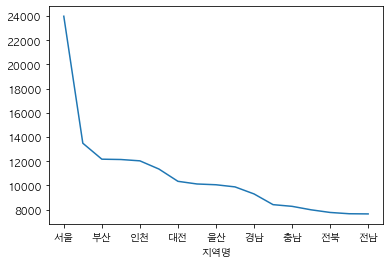

In [32]:
# 지역명으로 분양가격의 평균을 구하고 선그래프로 시각화 합니다.
# g = df_last.groupby(["지역명"])["평당분양가격"].mean()
g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot()

<AxesSubplot:xlabel='지역명'>

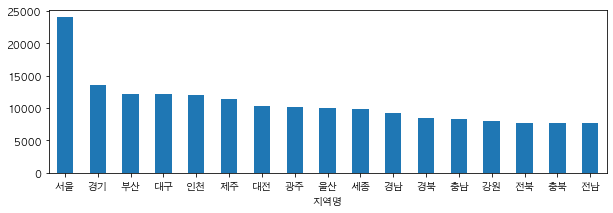

In [33]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# rot 글씨가 돌아가 있어 재대로 보고싶을떄 rot로 원상 복귀, figsize로 x축 글씨등 겹침의 문제 해결
g.plot.bar(rot=0, figsize=(10,3))

<AxesSubplot:xlabel='전용면적'>

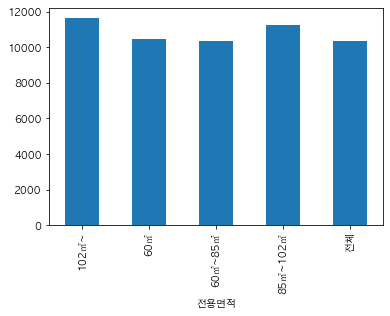

In [34]:
# 전용면적으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

<AxesSubplot:xlabel='연도'>

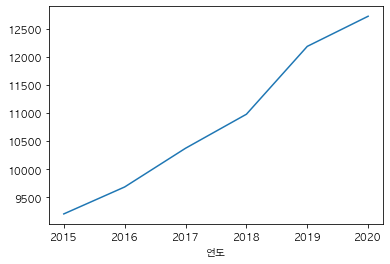

In [35]:
# 연도별 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

### box-and-whisker plot | diagram

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

* [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)
* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.


1. 최솟값
1. 제 1사분위수
1. 제 2사분위수( ), 즉 중앙값
1. 제 3 사분위 수( )
1. 최댓값

* Box plot 이해하기 : 
    * [박스 플롯에 대하여 :: -[|]- Box and Whisker](https://boxnwhis.kr/2019/02/19/boxplot.html)
    * [Understanding Boxplots – Towards Data Science](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

<AxesSubplot:>

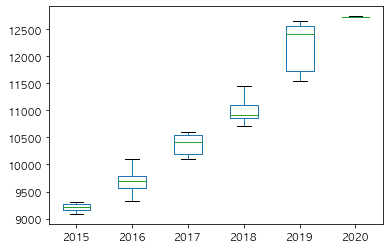

In [36]:
df_last.pivot_table(index="월", columns="연도", values="평당분양가격").plot.box()

<AxesSubplot:>

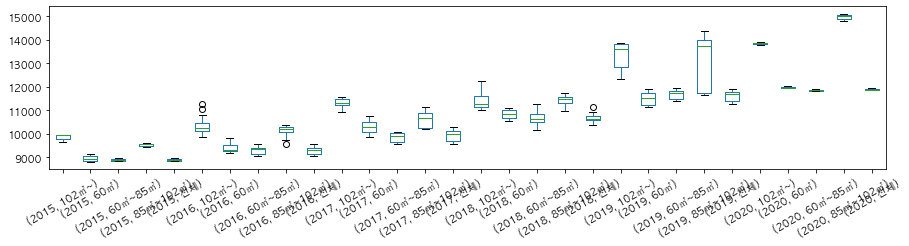

In [37]:
p = df_last.pivot_table(index="월", columns=["연도", "전용면적"], values="평당분양가격")
p.plot.box(figsize=(15,3), rot=30)

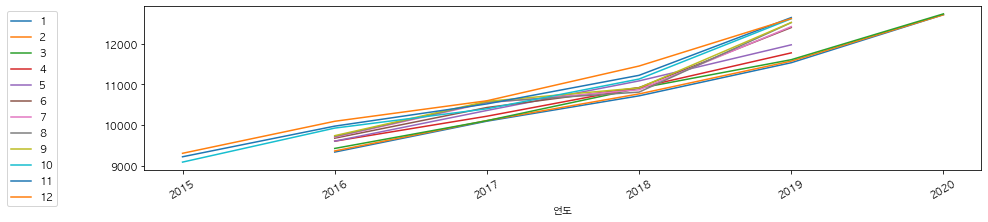

In [38]:
p = df_last.pivot_table(index="연도", columns=["월"], values="평당분양가격")
p.plot(figsize=(15,3), rot=30)
plt.legend(loc=2, bbox_to_anchor=(-0.17, 1)) #망할 범주 박스가 내 그래프를 가릴때 쓰면 됨
# 이분 블로그 좋음: https://dailyheumsi.tistory.com/97

### Seaborn 으로 시각화 해보기

In [39]:
# 라이브러리 로드하기
import seaborn as sns

#구버전 주피터는 아래의 작업도 같이 필요
# %matplotlib inline

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

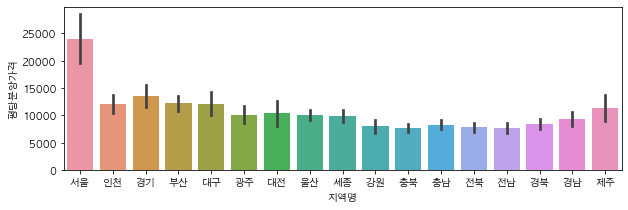

In [40]:
# barplot으로 지역별 평당분양가격을 그려봅니다.
# ci option = confidence interval 신뢰구간 (검은색 선으로 그래프에 표현됌), None 으로 지정하면 안그림
# seaborn의 장점은, 여러 통계 계산치를 일일이 직접 계산하여 데이터로 저장한 후 그래프로 표현하지 않고,
# 바로 그래프 생성 과정에서 연산을 넣어 그릴수 있다.
# default 연산 타입은 mean이다.
plt.figure(figsize=(10,3))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci="sd")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

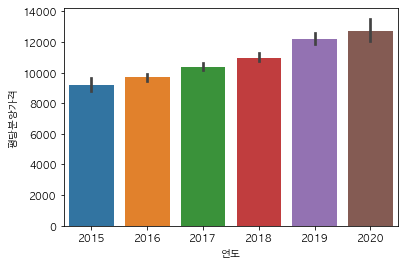

In [41]:
# barplot으로 연도별 평당분양가격을 그려봅니다.
sns.barplot(data=df_last, x="연도", y="평당분양가격")

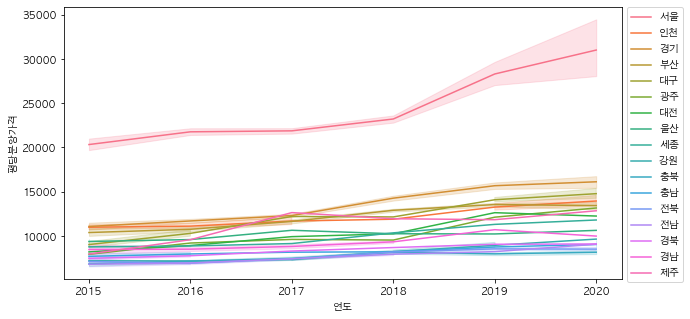

In [42]:
# lineplot으로 연도별 평당분양가격을 그려봅시다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅시다.
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

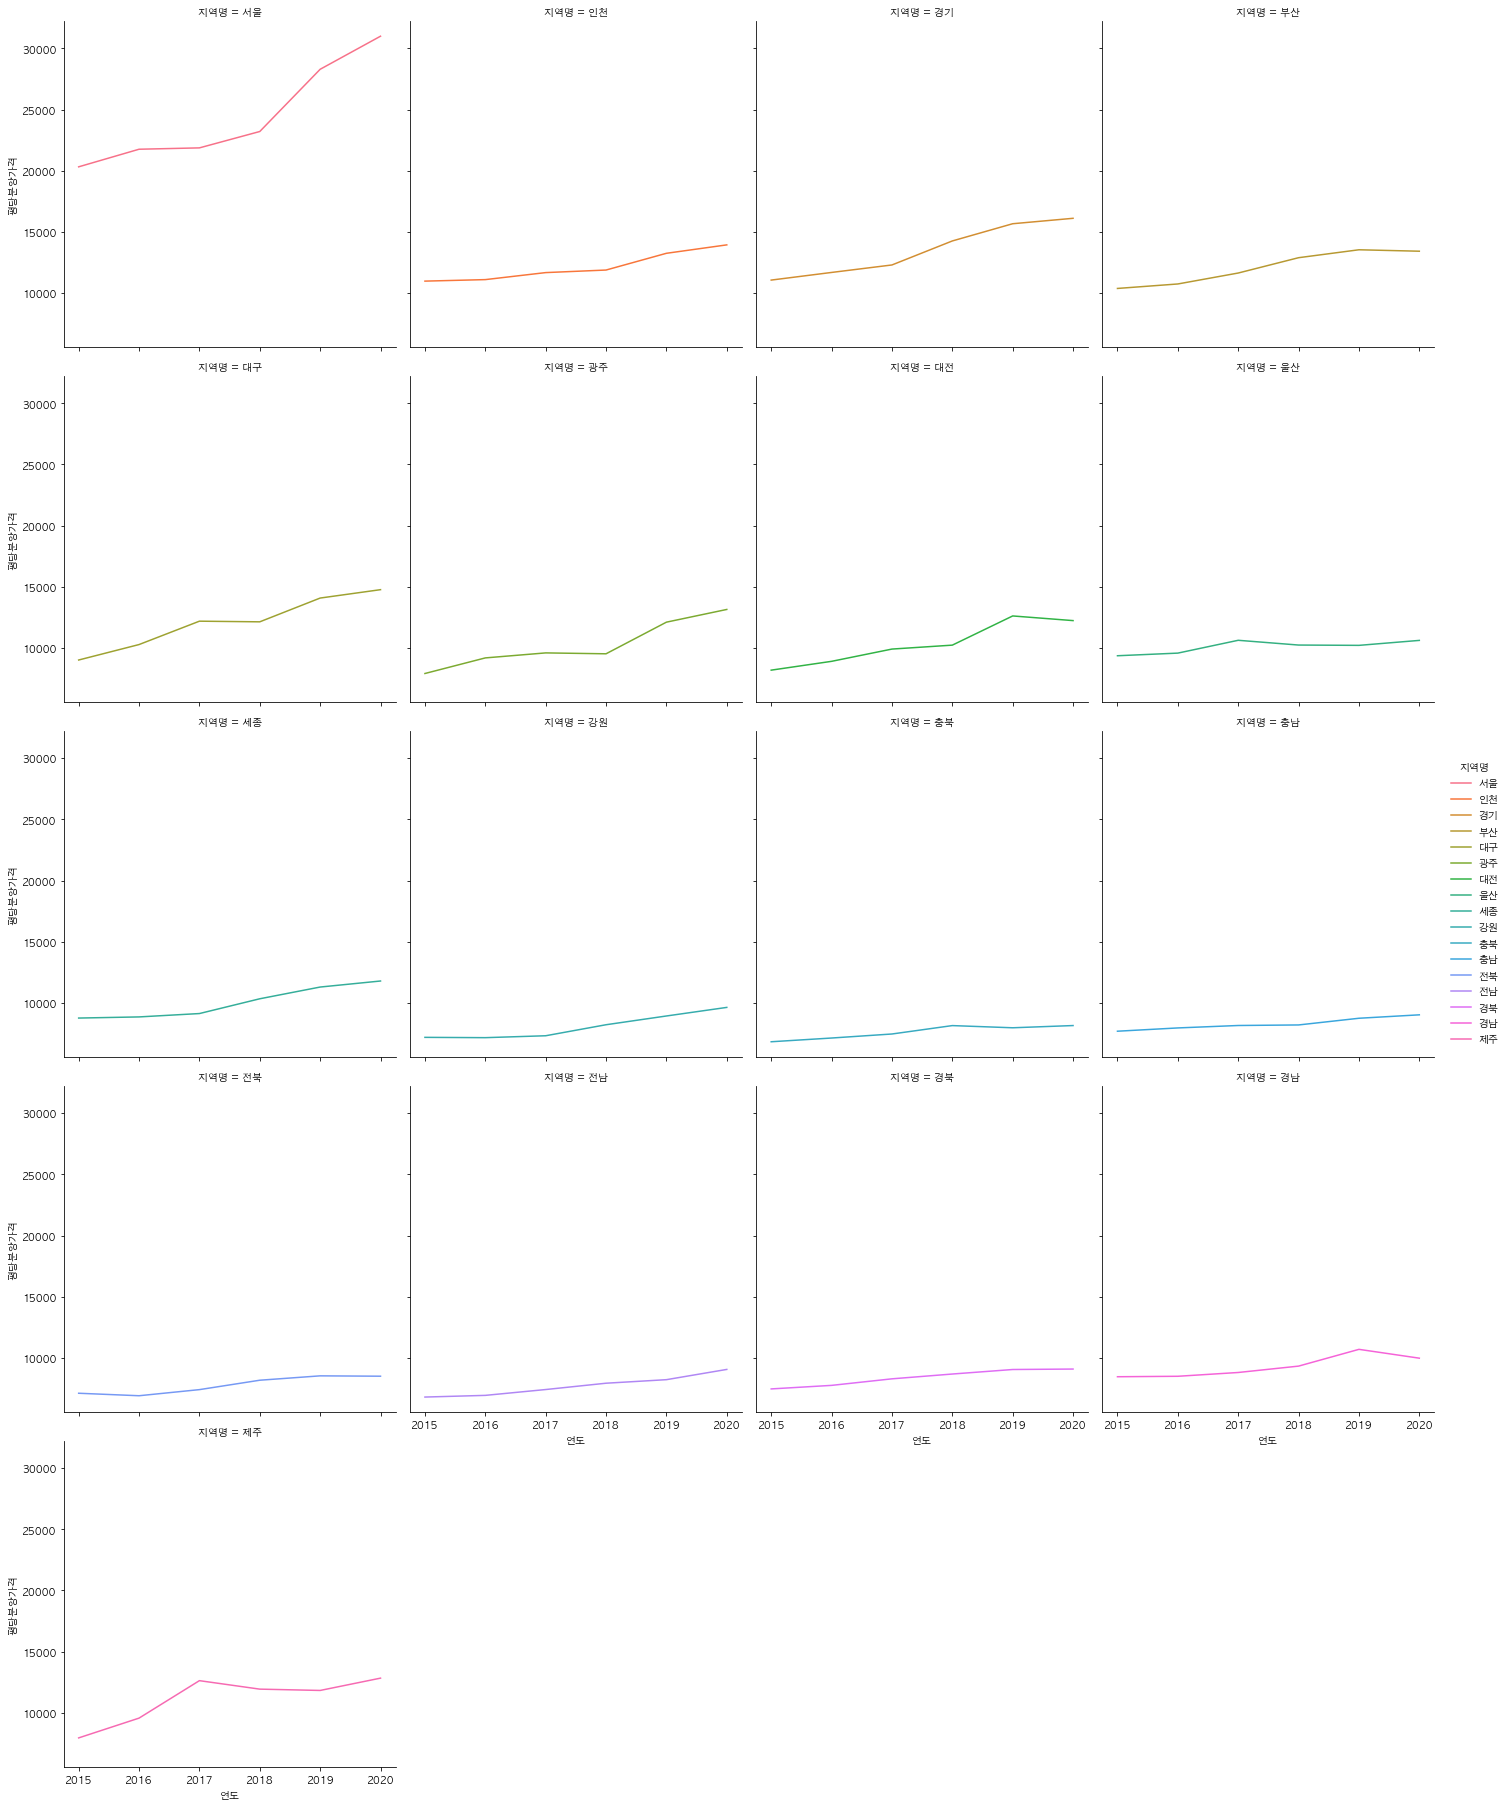

In [43]:
# relplot 으로 서브플롯 그리기
# relplot은 그릴수 있는 종류가 scatter 와 line밖에 없다.
# 이 옵션은 kind="그래프 종류"
# col의 옵션을 주어서 무엇을 기준으로 그래프를 분리해 그릴지 지정할수 있다.
# col_wrap옵션을 주지 않으면, 한줄에 모든 그래프를 붙여 그리기때문에 확인 하기 어렵다.
sns.relplot(data=df_last, x="연도", y="평당분양가격"
            ,kind="line", hue="지역명", col="지역명", col_wrap=4, ci=None)

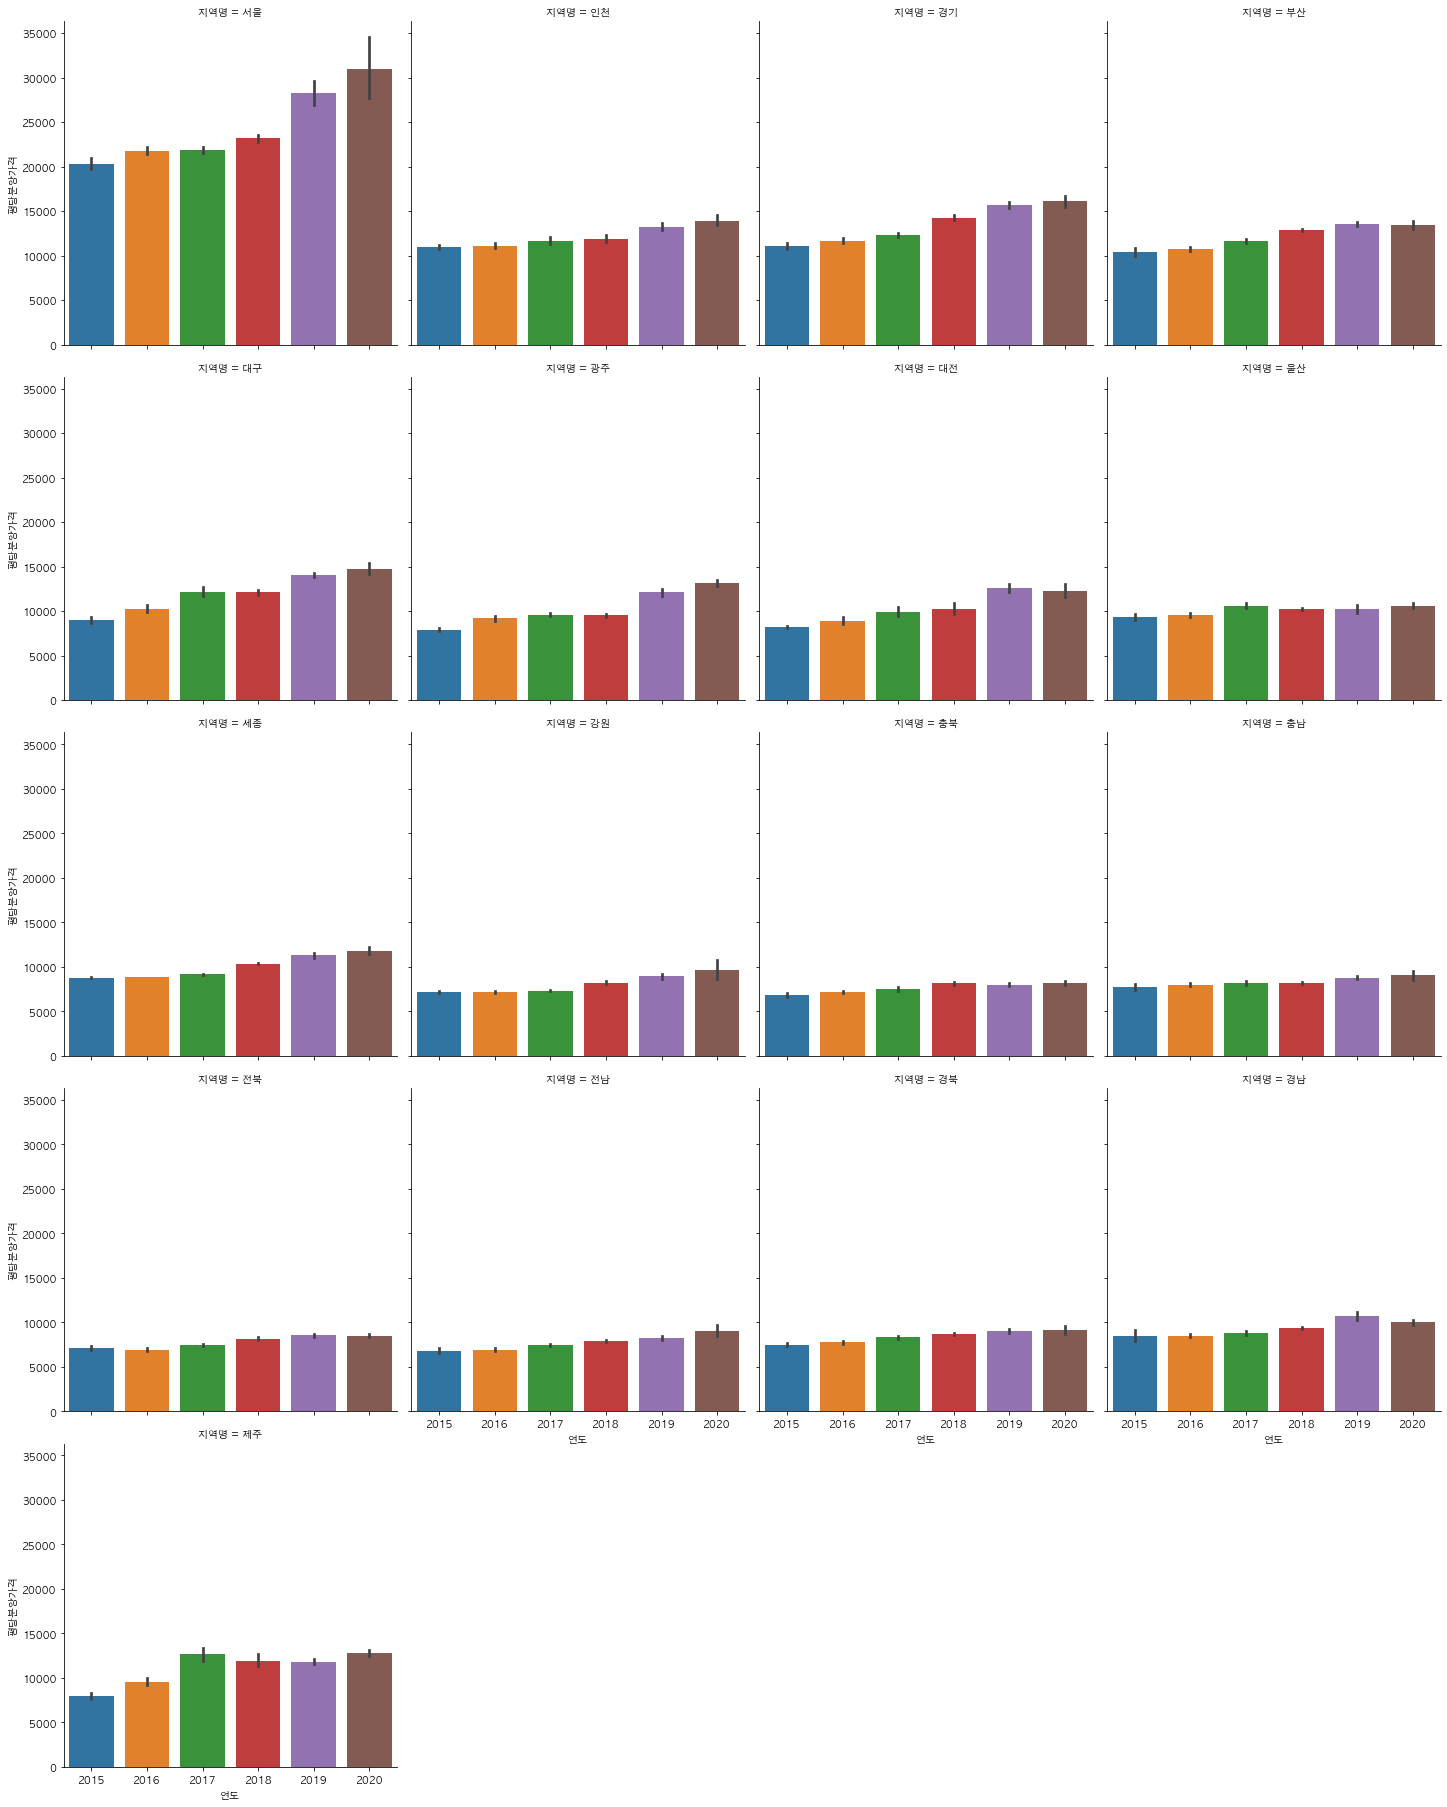

In [44]:
# catplot 으로 서브플롯 그리기
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

### boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

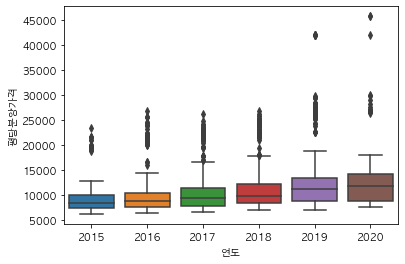

In [45]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값
sns.boxplot(data=df_last, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

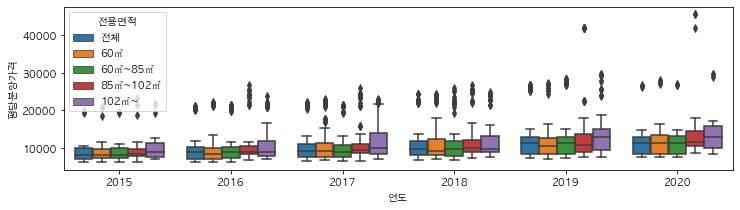

In [46]:
# hue옵션을 주어 전용면적별로 다르게 표시해봅시다.
plt.figure(figsize=(12,3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

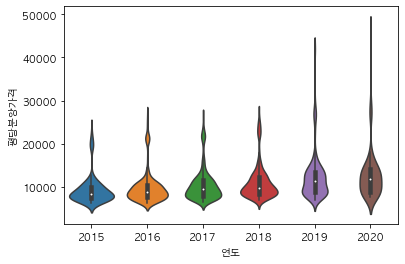

In [47]:
#연도별 평당분양가격을 violinplot으로 그려봅시다.
#boxplot을 보안한 violinplot
#box plot으로 볼때 어디에 데이터가 많이 분포되있는지 확인이 어렵다.
# violinplot은 boxplot처럼 1,2,3사분위도 알수 있으며, 데이터의 쏠림도 볼수 있다. 
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

### lmplot과 swarmplot 

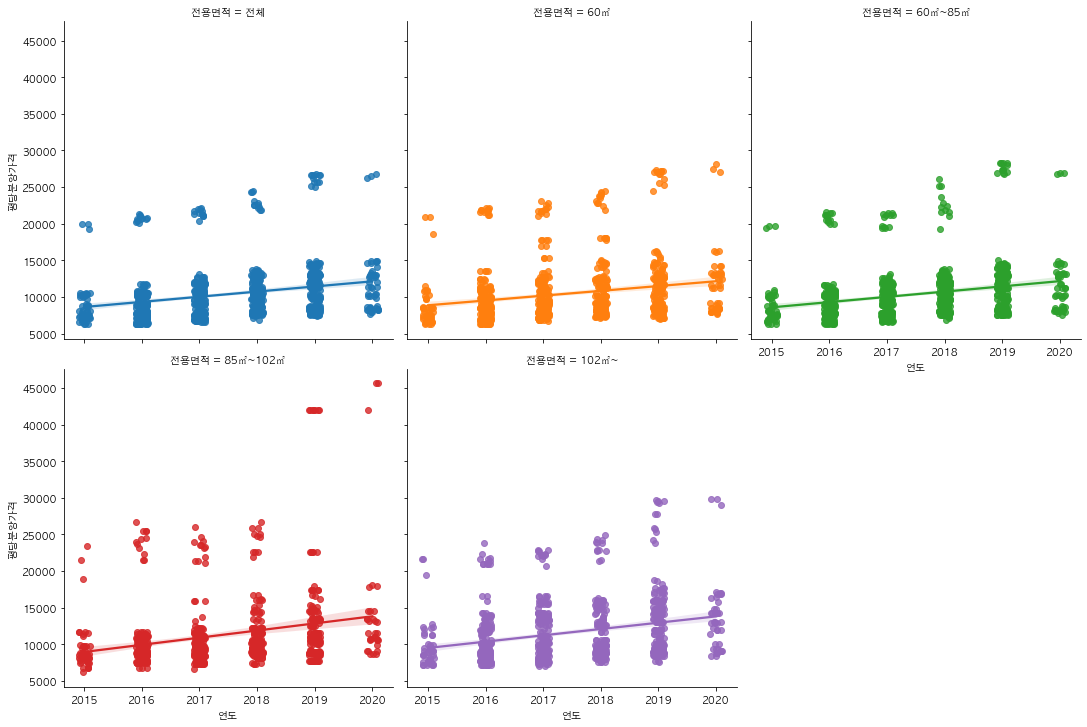

In [48]:
# 연도별 평당분양가격을 lmplot으로 그려봅니다. 
# hue 옵션으로 전용면적을 표현해 봅니다.
sns.lmplot(data=df_last, x="연도", y="평당분양가격", 
           hue="전용면적", col= "전용면적", col_wrap=3,
           x_jitter=.1)

/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categori

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

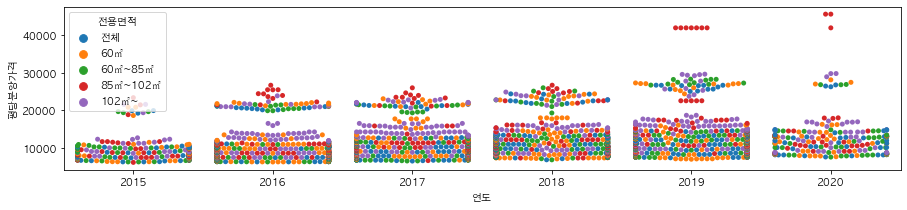

In [49]:
# 연도별 평당분양가격을 swarmplot 으로 그려봅니다. 
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기에 적합합니다.
# swarmplot은 일일이 점을 찍기 때문에 오래걸린다. => 큰데이터로 swarmplot 그리는것은 적합하지 않을수 있다.
plt.figure(figsize=(15,3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

### 이상치 보기

In [50]:
# 평당분양가격의 최대값을 구해서 max_price 라는 변수에 담습니다.
df_last["평당분양가격"].describe()

count     4260.000000
mean     10791.530634
std       4291.197050
min       6164.400000
25%       8100.675000
50%       9537.000000
75%      11883.300000
max      45655.500000
Name: 평당분양가격, dtype: float64

In [51]:
max_price = df_last["평당분양가격"].max()
max_price

45655.5

In [52]:
# 서울의 평당분양가격이 특히 높은 데이터가 있습니다. 해당 데이터를 가져옵니다.
df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
4423,서울,2020,2,13835.0,45655.5,85㎡~102㎡
4508,서울,2020,3,13835.0,45655.5,85㎡~102㎡


### 수치데이터 히스토그램 그리기

distplot은 결측치가 있으면 그래프를 그릴 때 오류가 납니다. 
따라서 결측치가 아닌 데이터만 따로 모아서 평당분양가격을 시각화하기 위한 데이터를 만듭니다.
데이터프레임의 .loc를 활용하여 결측치가 없는 데이터에서 평당분양가격만 가져옵니다.

<AxesSubplot:>

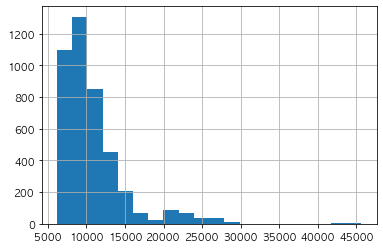

In [53]:
# 수치데이터를 카테고리 형태로 바꾸는 작업을 binning 혹은 bucketing이라 한다.
df_last["평당분양가격"].hist(bins=20)
# h = df_last.hist(bins=10)

In [54]:
# 결측치가 없는 데이터에서 평당분양가격만 가져옵니다. 그리고 price라는 변수에 담습니다.
# .loc[행]
# .loc[행, 열]
# bins라는 옵션을 주면, 몇개의 통에다 데이터를 분리하여 담을지를 얘기한다.
# df_last[df_last["평당분양가격"].notnull()]
# loc을 사용하면, 평당분양가격이 null이 아닌데이터중, 평당분양가격만 보여줘의 뜻
# loc으로 원하는 정확한 데이커 행을 지정하지 않을경우 모든 columns에서 평당분양가격이 null이 아닌데이터 보여줌
price = df_last.loc[df_last["평당분양가격"].notnull(), "평당분양가격"]

/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

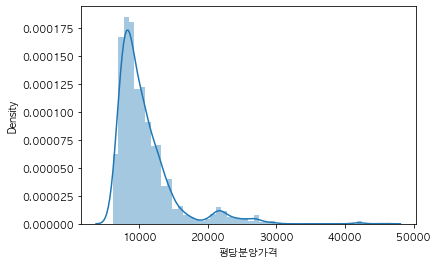

In [55]:
# distplot으로 평당분양가격을 표현해 봅니다.
# sns.displot(df_last["평당분양가격"])
# 에러가 난다, 결측치가 제대로 처리가 않났기 때문
sns.distplot(price)
#결과 값을 확인해보면, 위의 히스토그램 그렸던 그래프와는 왼쪽(y-axis)의 값이 다른것을 확인할수 있다.
# 이유는 kde가 부드러운 곡선으로 그래프를 그릴수 있게 표시하는데, kde의 밀도가 1이 되는것을 찾아 그려준다.
# kde는 가우스분포를 추정하여 그린 그래프다.
# 가우스분포를 잘 모르겠어서 뭔말인지 모르겠다... 통계학 공부좀 해야겠다...ㅠㅠ

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

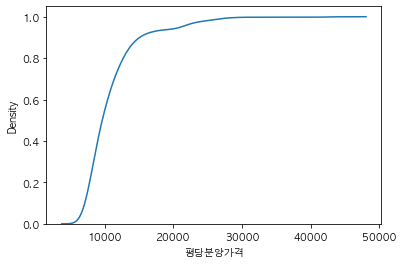

In [56]:
# hist=False하면 그래프 안에 나와 있는 바그래프가 사라지고 라인만 보인다.
# 러그 true하면 밑에 데이터의 빈도수도 눈으로 확인이 가능하다.
# sns.distplot(price, hist=False, rug=True)
sns.kdeplot(price, cumulative=True) #누적그래프 기록이 가능 (누적 판매량, 누적 거래량 등의 데이터에는 유용)

* distplot을 산마루 형태의 ridge plot으로 그리기
* https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples
* https://seaborn.pydata.org/examples/kde_ridgeplot.html

/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dk/o

/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


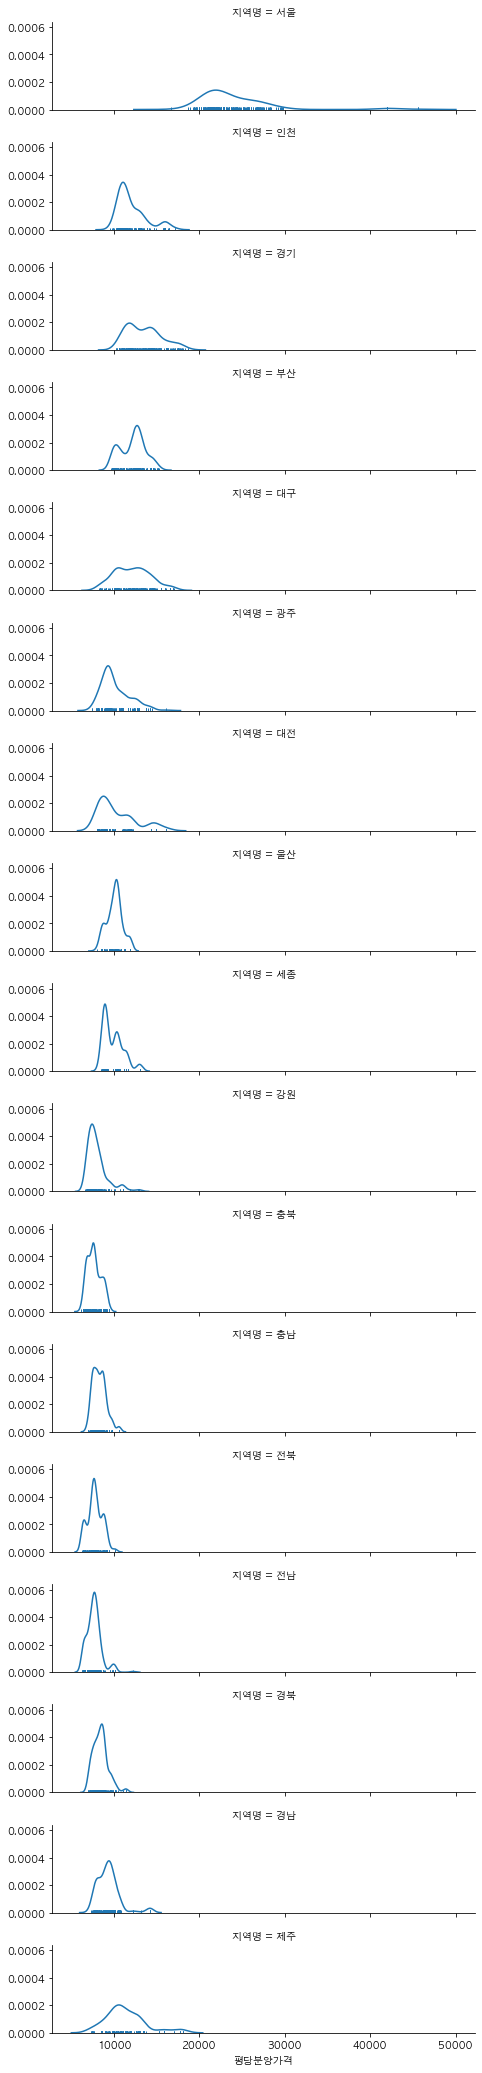

In [57]:
# subplot 으로 표현해 봅니다.
g = sns.FacetGrid(df_last, row="지역명",
                 height=1.7, aspect=4,)
g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4444 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4444 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.4444 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


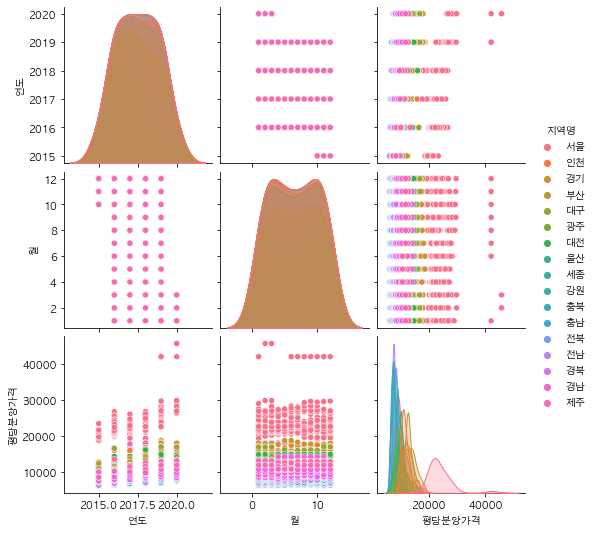

In [73]:
# pairplot
# test = df_last[df_last["연도"] < 2020]
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(),
                          ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명", diag_kws={'bw':0.4444})

In [77]:
df_last["전용면적"].value_counts()

85㎡~102㎡    918
60㎡~85㎡     918
전체          918
102㎡~       918
60㎡         918
Name: 전용면적, dtype: int64

## 2015년 8월 이전 데이터 보기

In [80]:
# col혹은 row가 ...으로 생략 되서 보일수도 있어 옵션을 주어 늘릴수 있다
pd.options.display.max_columns = 100

In [81]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [85]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [82]:
# 모든 컬럼이 출력되게 설정합니다.
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [84]:
#결측치가 있는지 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [86]:
# head 로 미리보기 합니다.
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [90]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name = "평당분양가격")

In [93]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [94]:
date = "2013년12월"
date

'2013년12월'

In [97]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.
date.split("년")

['2013', '12월']

In [98]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.
date.split("년")[0]

'2013'

In [99]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.
date.split("년")[-1].replace("월","")

'12'

In [105]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_year(date):
    year = date.split("년")[0]
    return int(year)

y = parse_year(date)
y

2013

In [106]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.
parse_year(date)

2013

In [107]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.
def parse_month(date):
    month = date.split("년")[-1].replace("월","")
    return int(month)

In [108]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.
parse_month(date)

12

In [111]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["연도"] = df_first_melt['기간'].apply(parse_year)
df_first_melt["연도"]

0      2013
1      2013
2      2013
3      2013
4      2013
       ... 
352    2015
353    2015
354    2015
355    2015
356    2015
Name: 연도, Length: 357, dtype: int64

In [112]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["월"] = df_first_melt['기간'].apply(parse_month)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [114]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
2672,울산,2018,5,3174.0,10474.2,60㎡~85㎡


In [121]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [135]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [147]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.
# .copy()를 하지 않게 되면 deepcopy가 아니기 때문에 원본 데이터 즉 df_last의 값이 변할수있다.

# df_last[df_last["전용면적"] == "전체"][cols]
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.tail(1)

,지역명,연도,월,평당분양가격
4585,제주,2020,3,13051.5


In [148]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.

df_first_prepare = df_first_melt[cols].copy()
df_first_prepare

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189
1,부산,2013,12,8111
2,대구,2013,12,8080
3,인천,2013,12,10204
4,광주,2013,12,6098
...,...,...,...,...
352,전북,2015,8,6580
353,전남,2015,8,6289
354,경북,2015,8,7037
355,경남,2015,8,7665


### concat 으로 데이터 합치기
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [150]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.

df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

(1275, 4)

In [152]:
# 제대로 합쳐졌는지 미리보기를 합니다.
print(df.head())
print(df.tail())

  지역명    연도   월   평당분양가격
0  서울  2013  12  18189.0
1  부산  2013  12   8111.0
2  대구  2013  12   8080.0
3  인천  2013  12  10204.0
4  광주  2013  12   6098.0
     지역명    연도  월   평당분양가격
4565  전북  2020  3   8144.4
4570  전남  2020  3   8500.8
4575  경북  2020  3   8431.5
4580  경남  2020  3   9794.4
4585  제주  2020  3  13051.5


In [153]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.
df["연도"].value_counts(sort=False)

2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
2020     51
Name: 연도, dtype: int64

### pivot_table 사용하기
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [161]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7171.0,11841.0,8164.0,7803.0,9471.0,11507.0,9056.0,11664.0,21425.0,9133.0,11328.0,10749.0,7246.0,7075.0,10907.0,7456.0,6770.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,8226.0,14829.0,10003.0,9002.0,12682.0,14672.0,11733.0,12934.0,26534.0,11411.0,10372.0,13584.0,8324.0,8144.0,13052.0,8637.0,7810.0


<AxesSubplot:xlabel='지역명', ylabel='연도'>

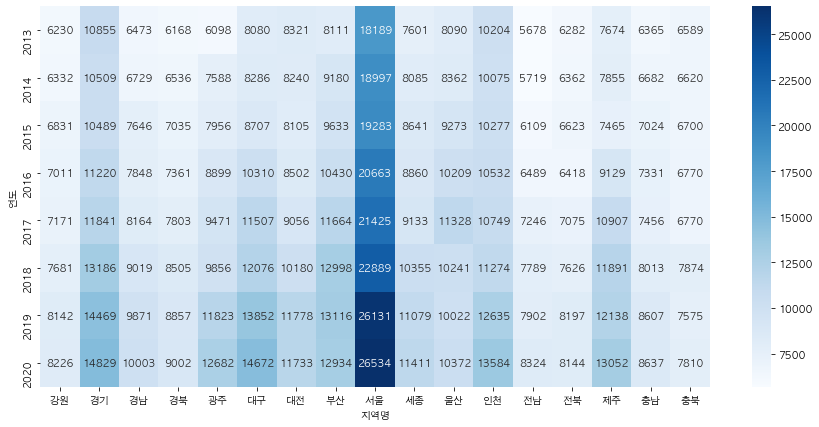

In [168]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.
plt.figure(figsize=(15,7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

In [169]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.

t.T

연도,2013,2014,2015,2016,2017,2018,2019,2020
지역명,,,,,,,,
강원,6230.0,6332.0,6831.0,7011.0,7171.0,7681.0,8142.0,8226.0
경기,10855.0,10509.0,10489.0,11220.0,11841.0,13186.0,14469.0,14829.0
경남,6473.0,6729.0,7646.0,7848.0,8164.0,9019.0,9871.0,10003.0
경북,6168.0,6536.0,7035.0,7361.0,7803.0,8505.0,8857.0,9002.0
광주,6098.0,7588.0,7956.0,8899.0,9471.0,9856.0,11823.0,12682.0
대구,8080.0,8286.0,8707.0,10310.0,11507.0,12076.0,13852.0,14672.0
대전,8321.0,8240.0,8105.0,8502.0,9056.0,10180.0,11778.0,11733.0
부산,8111.0,9180.0,9633.0,10430.0,11664.0,12998.0,13116.0,12934.0
서울,18189.0,18997.0,19283.0,20663.0,21425.0,22889.0,26131.0,26534.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

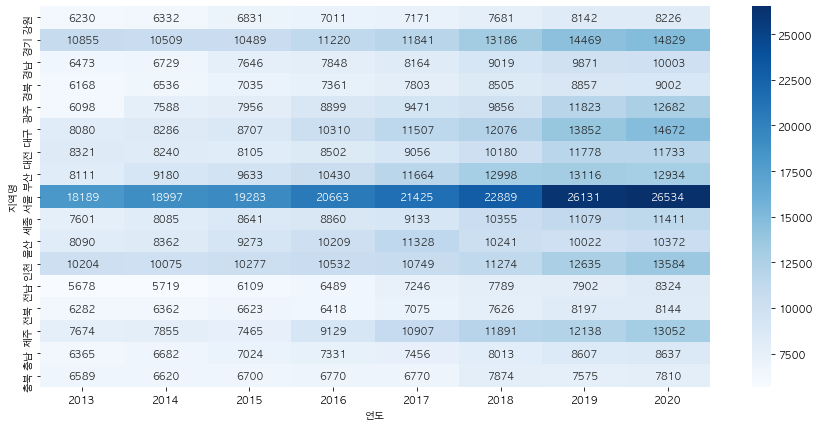

In [172]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.

plt.figure(figsize=(15,7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")

In [177]:
# Groupby로 그려봅니다. 인덱스에 ["연도", "지역명"] 을 넣고 그려봅니다.
g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.0,10855.0,6473.0,6168.0,6098.0,8080.0,8321.0,8111.0,18189.0,7601.0,8090.0,10204.0,5678.0,6282.0,7674.0,6365.0,6589.0
2014,6332.0,10509.0,6729.0,6536.0,7588.0,8286.0,8240.0,9180.0,18997.0,8085.0,8362.0,10075.0,5719.0,6362.0,7855.0,6682.0,6620.0
2015,6831.0,10489.0,7646.0,7035.0,7956.0,8707.0,8105.0,9633.0,19283.0,8641.0,9273.0,10277.0,6109.0,6623.0,7465.0,7024.0,6700.0
2016,7011.0,11220.0,7848.0,7361.0,8899.0,10310.0,8502.0,10430.0,20663.0,8860.0,10209.0,10532.0,6489.0,6418.0,9129.0,7331.0,6770.0
2017,7171.0,11841.0,8164.0,7803.0,9471.0,11507.0,9056.0,11664.0,21425.0,9133.0,11328.0,10749.0,7246.0,7075.0,10907.0,7456.0,6770.0
2018,7681.0,13186.0,9019.0,8505.0,9856.0,12076.0,10180.0,12998.0,22889.0,10355.0,10241.0,11274.0,7789.0,7626.0,11891.0,8013.0,7874.0
2019,8142.0,14469.0,9871.0,8857.0,11823.0,13852.0,11778.0,13116.0,26131.0,11079.0,10022.0,12635.0,7902.0,8197.0,12138.0,8607.0,7575.0
2020,8226.0,14829.0,10003.0,9002.0,12682.0,14672.0,11733.0,12934.0,26534.0,11411.0,10372.0,13584.0,8324.0,8144.0,13052.0,8637.0,7810.0


<AxesSubplot:xlabel='연도', ylabel='지역명'>

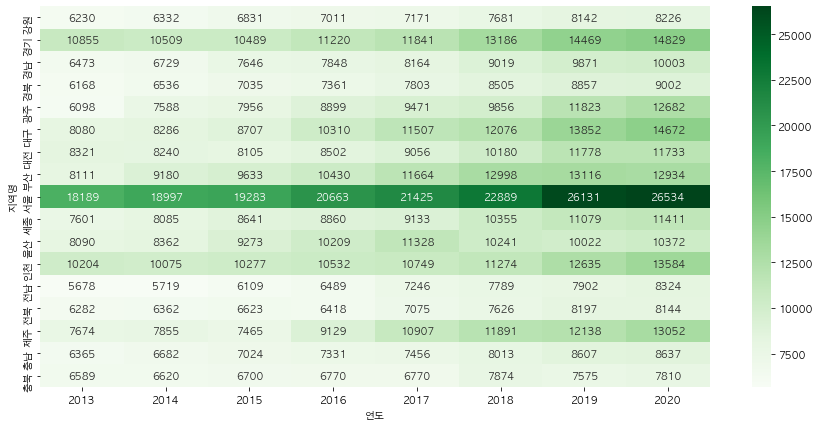

In [182]:
plt.figure(figsize=(15,7))
sns.heatmap(g.T, cmap="Greens", annot=True, fmt=".0f")

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

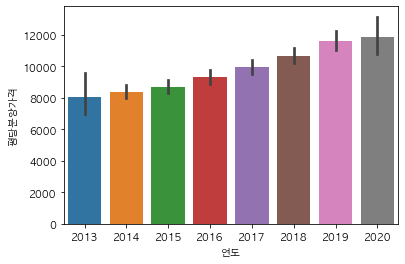

In [185]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격")

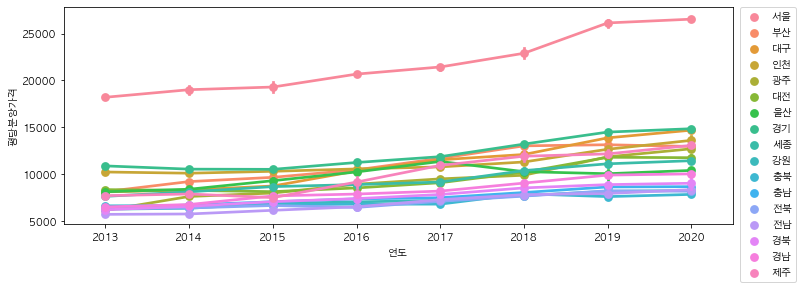

In [190]:
# pointplot 으로 연도별 평당분양가격 그리기
plt.figure(figsize=(12,4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

(75, 4)


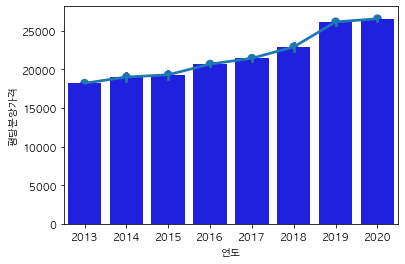

In [198]:
# 서울만 barplot 으로 그리기
df_seoul = df[df["지역명"]=="서울"]
print(df_seoul.shape)

g = sns.barplot(data=df_seoul, x="연도", y="평당분양가격", color="b")
l = sns.pointplot(data=df_seoul, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

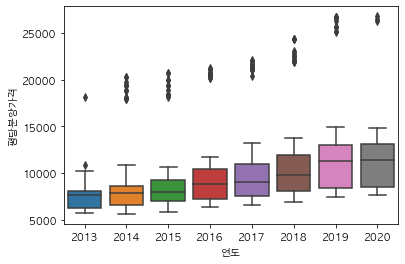

In [199]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

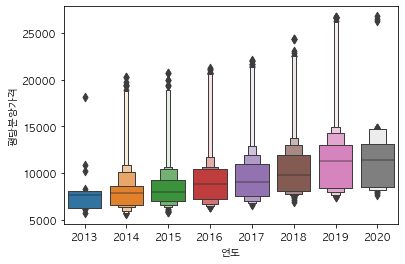

In [201]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

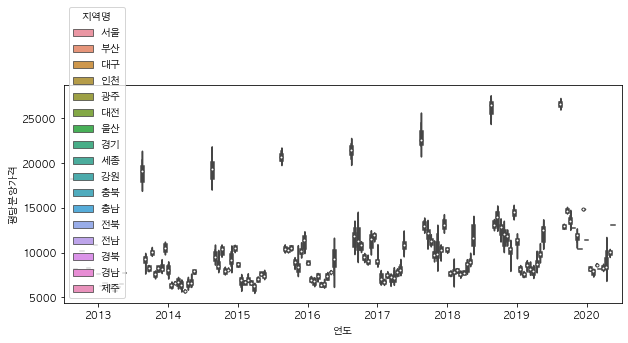

In [214]:
# 연도별 평당분양가격 violinplot 그리기
plt.figure(figsize=(10,4))
sns.violinplot(data=df,x="연도", y="평당분양가격", hue="지역명")

/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categori

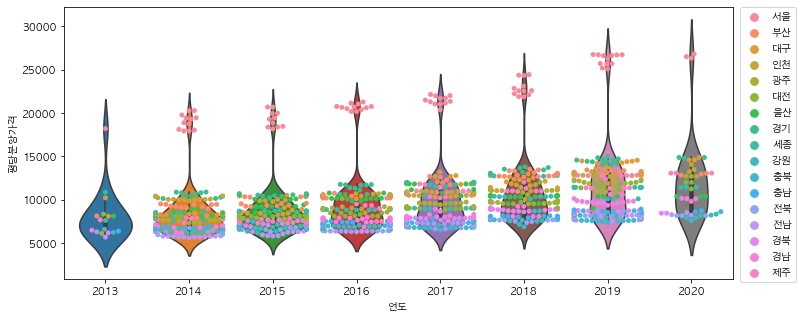

In [213]:
# 연도별 평당분양가격 swarmplot 그리기
# sns.lmplot(data=df, x="연도", y="평당분양가격")
plt.figure(figsize=(12,5))
sns.violinplot(data=df,x="연도", y="평당분양가격")
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

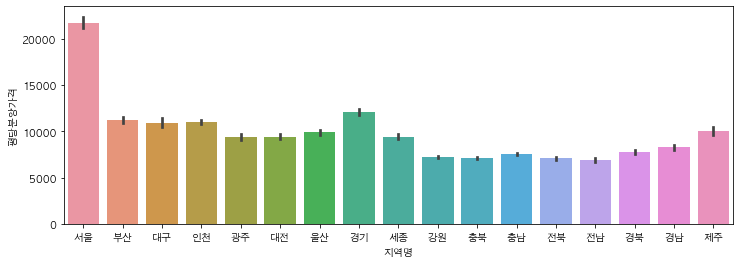

In [218]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(12,4))
sns.barplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

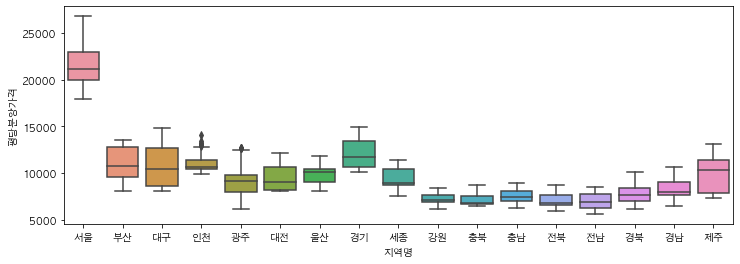

In [223]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

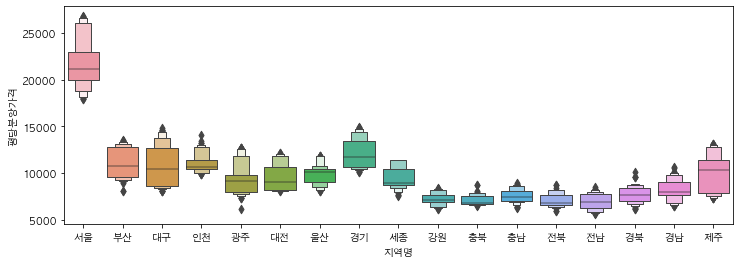

In [224]:
plt.figure(figsize=(12,4))
sns.boxenplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

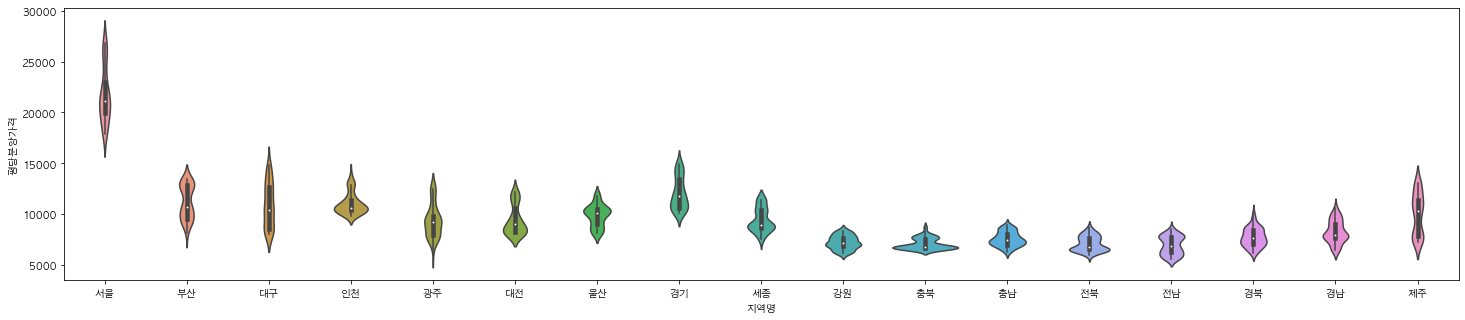

In [225]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(25,5))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/dk/opt/anaconda3/lib/python3.8/site-packages/seaborn/categoric

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

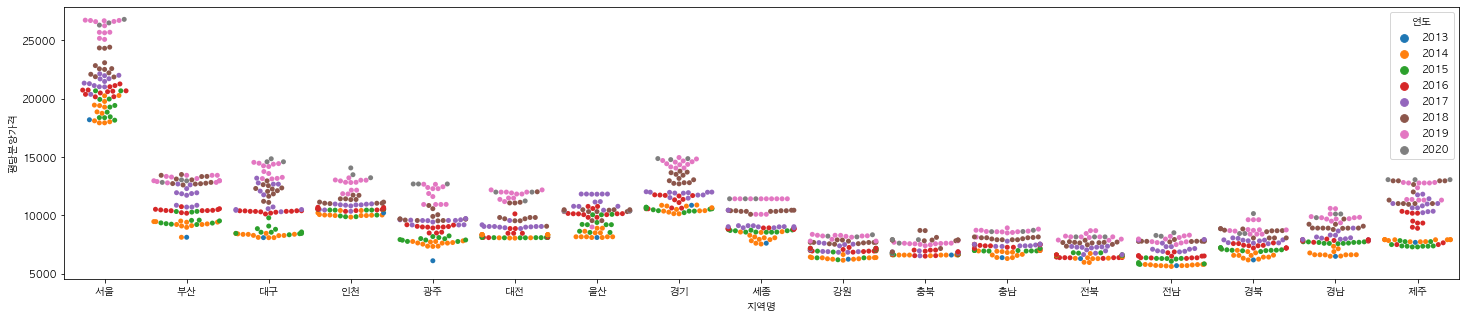

In [226]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(25,5))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도")